## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [67]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
#Load Dataset
data = pd.read_csv('kc_house_data.csv')
df = pd.DataFrame(data)
df_copy = df #Create a copy of the original dataframe to experiment with
df.head() #Display first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [69]:
df_copy['date'] = df_copy.date.astype('datetime64[ns]')

In [70]:
df.tail() #Display last 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [71]:
df.info() #Check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [72]:
df.nunique() #Get the number of unique values

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [73]:
for col in df.columns:
    print(col, '\n', df[col].value_counts().head(), '\n\n')

id 
 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64 


date 
 2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
Name: date, dtype: int64 


price 
 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64 


bedrooms 
 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64 


bathrooms 
 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64 


sqft_living 
 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64 


sqft_lot 
 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64 


floors 
 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64 


waterfront 
 0.0    19075
1.0      146
Name: waterfront, dtype: int64 


view 
 0.0    19422
2.0      957
3.0      508
1.0      

In [74]:
#Check for Duplicates
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


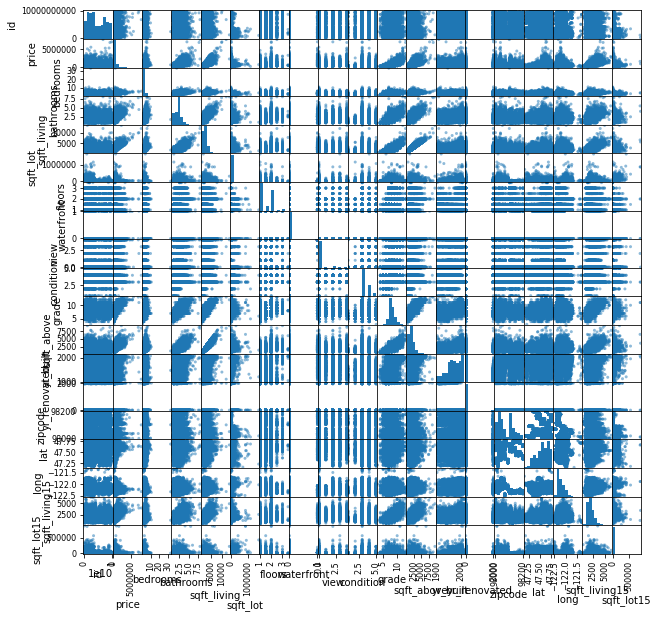

In [4]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

# Recs
* treat nulls
* convert date to dtype datetime64
* take a closer look at 'view' and 'sqft_basement'
* convert zipcode,grade, and year dtype object (categorical)
* Treat waterfront as object
& bedrooms should be categorical?
* sqft_basement, yr_renovated: does '0.0' mean the house has not been renovated and has not basement?
* bathrooms: whats a '0.75', '2.25', '1.75' bathroom?
    * 0.75 bath has a toilet sink and a shower without a tub. A 0.5 bath has no bathing at all.
    * a 1.25 includes a bidet 
    * each feature = 0.25
* Sqft_basement has '?' values- treat. Convert to type float.
* Max Outliers? "33 bedrooms"?
* why do view values range from "0" through "4"?
* Create a column to identify houses as "livable" (grade 6+) and non-livable (5 and below), then group by "livable" and "non-livable"


## Data Cleaning

In [75]:
print(df.isnull().sum()) #Get the sum of null values per column


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [76]:
df['waterfront'] = df['waterfront'].fillna(0.0) #Fill null values with mode value

In [77]:
df = df.drop(['view'], axis=1) #Drop view column because the effects on price are neglible

In [78]:
df.head() #Sanity Check

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [79]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0) #Fill null values with mode value

In [80]:
df.info() #Sanity Check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(11), object(1)
memory usage: 3.3+ MB


In [81]:
df['sqft_basement'] = df.sqft_basement.replace('?','0.0') #replace extraneous data with because we are unsure of the home has a basement

In [82]:
df = df.drop(15856, axis=0) #Outlier - 33 bedrooms, but 1.75 bath, and 1620 sqrt. Could be a typo

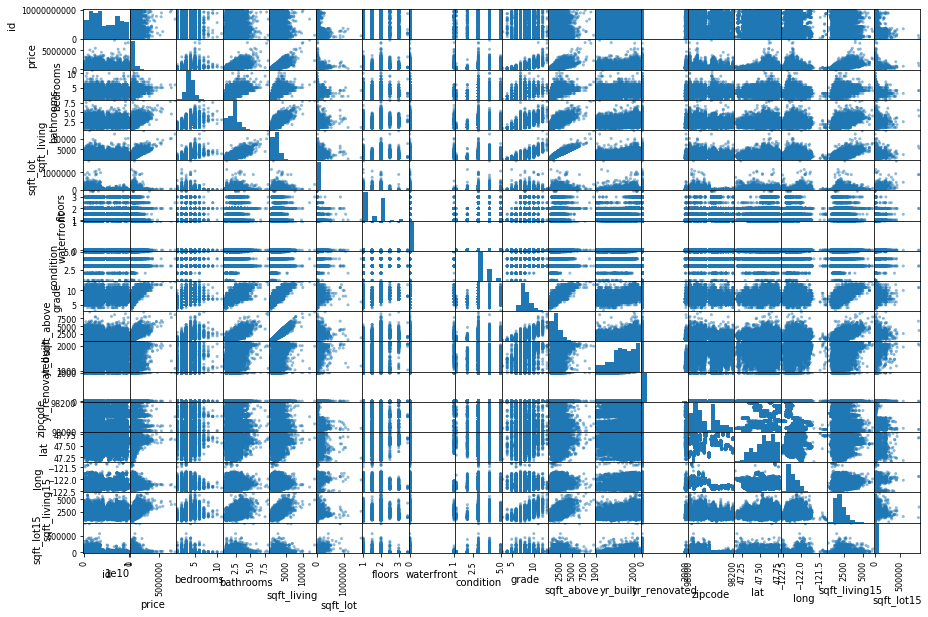

In [56]:
pd.plotting.scatter_matrix(df, figsize=(15,10)); #Do a visual check for normality and linearity

In [17]:
df.info() #Sanity Check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(7), int64(11), object(2)
memory usage: 3.5+ MB


In [83]:
#Cols to drop lat, long, sqft_living15, sqft_lot15, id, these cols contrubte least to whether or not someone would buy a particular house
df = df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15', 'id'], axis=1)

In [84]:
df.head() #Sanity Check

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074


In [85]:
# Create new column 'is_renovated', where 1.0 represents houses that have been renovated and 0.0 represents houses that have not
df.loc[df['yr_renovated'] > 0.0 , 'is_renovated'] = 1.0

In [86]:
df['is_renovated'] = df['is_renovated'].fillna(0.0)

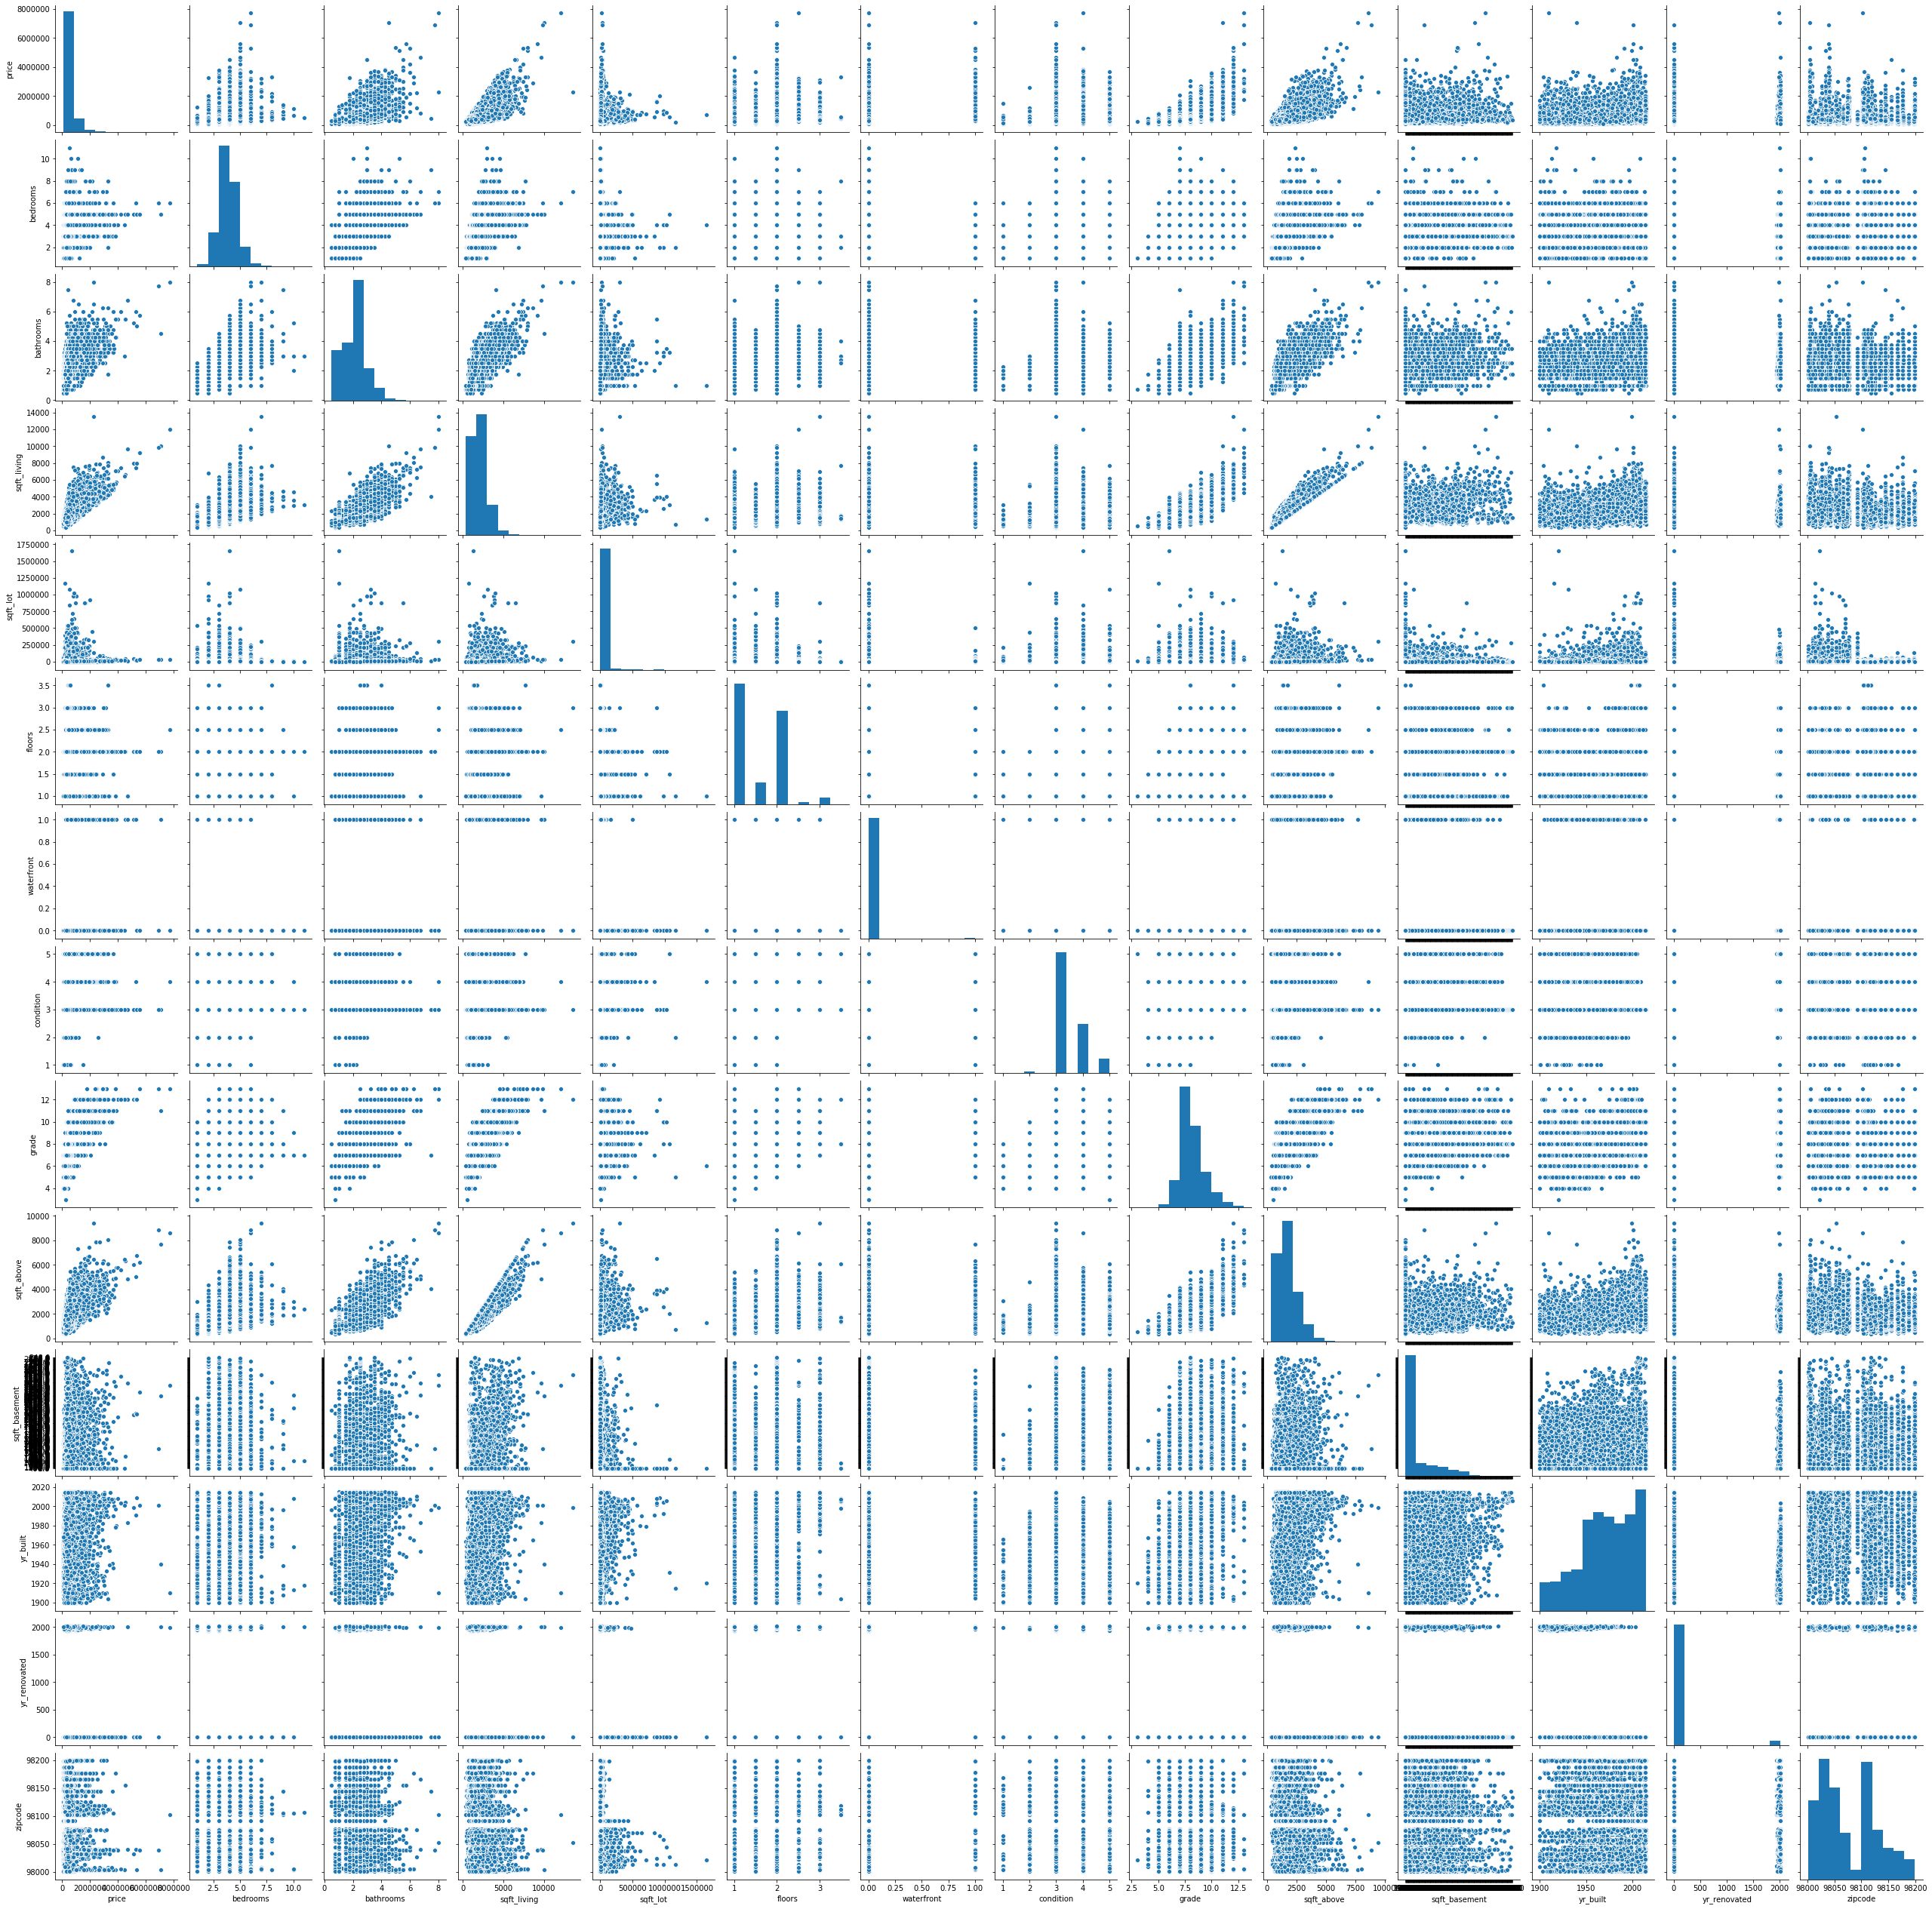

In [71]:
sns.pairplot(df) #Visual check for normality and linearity

In [87]:
df['sqft_basement'] = df['sqft_basement'].astype('float64') #convert sqft to dtype float fron object

In [88]:
df['date'] = df['date'].astype('datetime64[ns]') #Convert date to dtype datetime from object

In [89]:
df.info() #Sanity Check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 16 columns):
date             21596 non-null datetime64[ns]
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
is_renovated     21596 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(8)
memory usage: 2.8 MB


In [90]:
#Store the dataframe columns into Continuous and Categorical datatypes

continuous = ['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built','date']
categorical = ['bedrooms', 'bathrooms', 'floors', 'zipcode', 'grade', 'condition', 'waterfront', 'is_renovated'] 

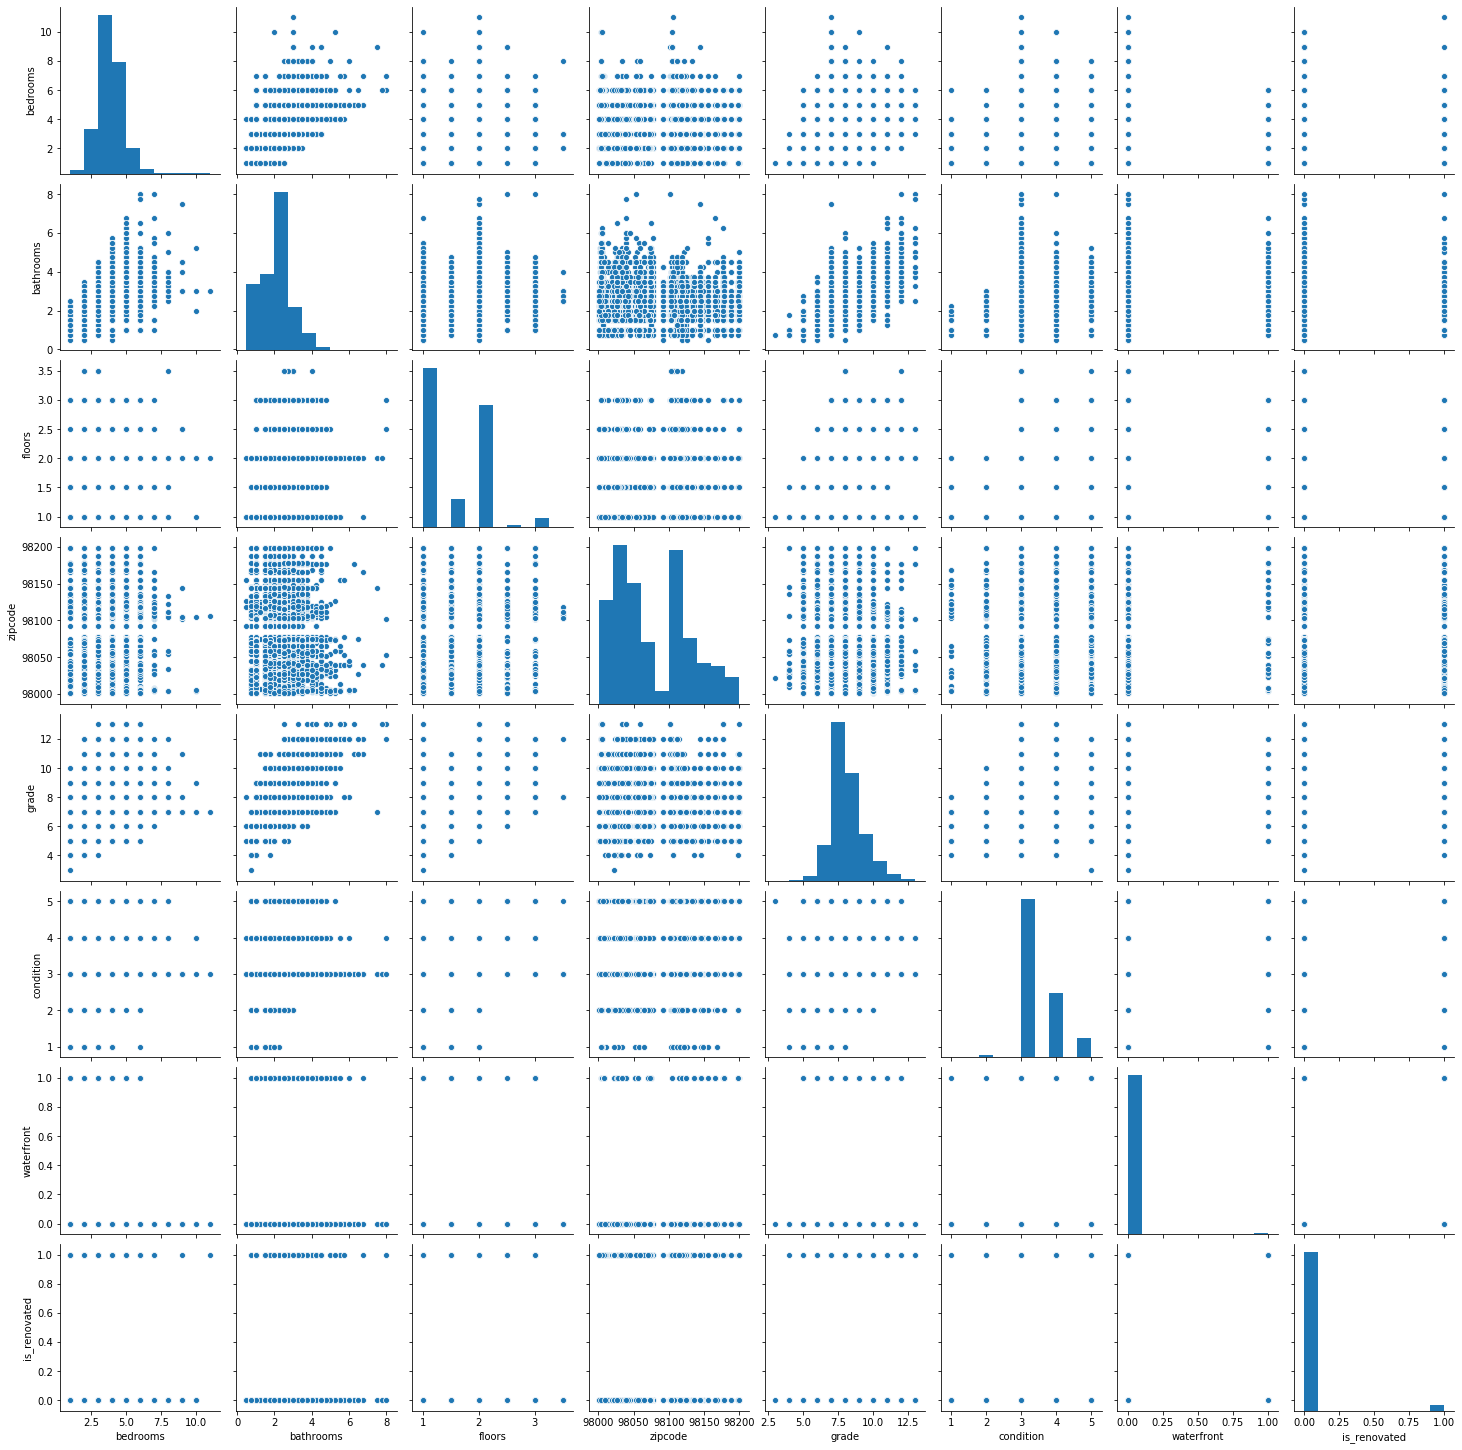

In [41]:
sns.pairplot(df[categorical]) #Plot categorical variables to do a visual check for linearity and normality

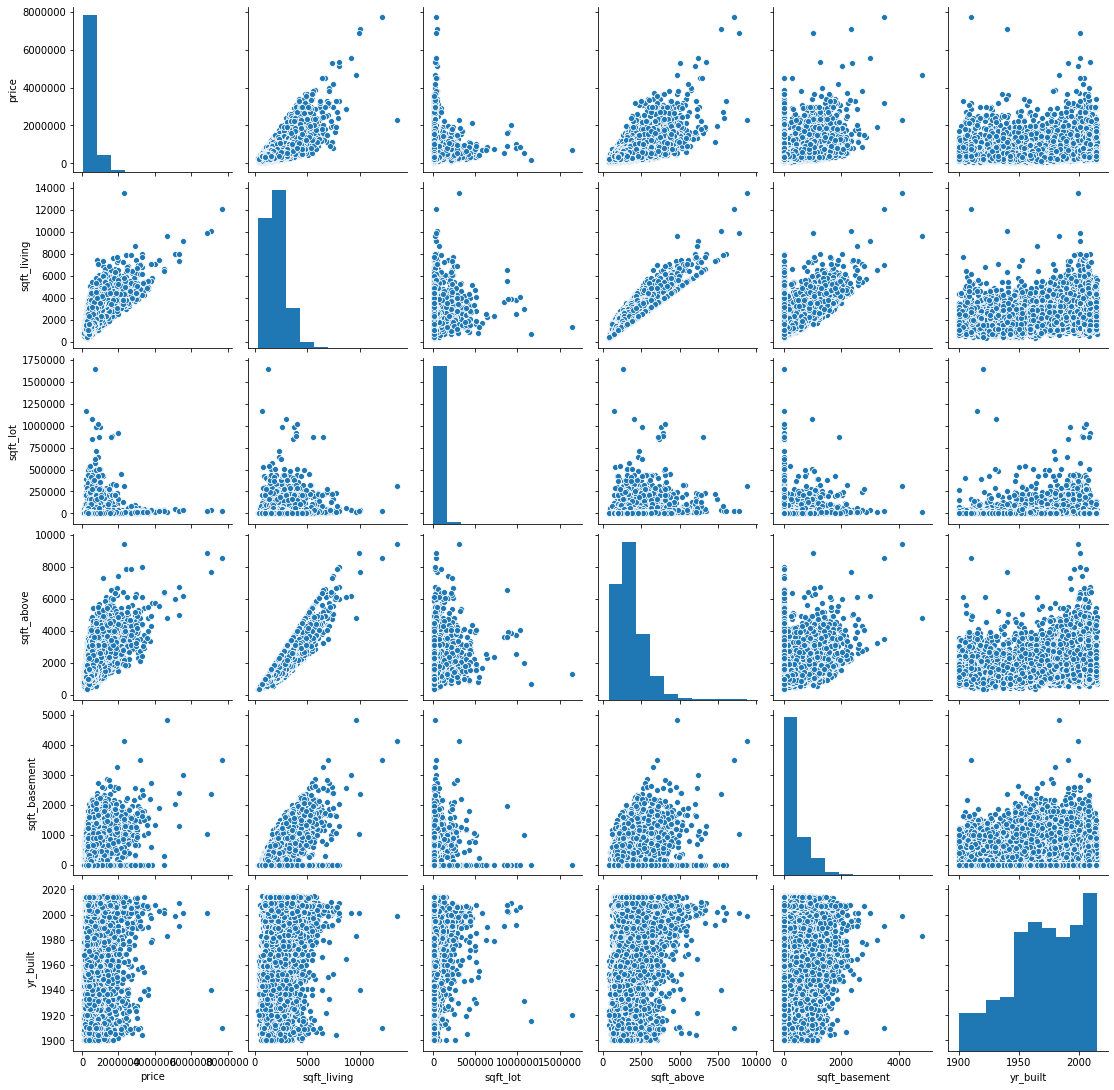

In [19]:
sns.pairplot(df[continuous]) #Plot continuous variables to do a visual check for linearity and normality

In [91]:
corrr = df[continuous].corr() #Correlation Table for Continuous Variables
corrr

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
price,1.000000,0.701929,0.089879,0.605392,0.321103,0.053965
sqft_living,0.701929,1.000000,0.173449,0.876448,0.428683,0.318140
sqft_lot,0.089879,0.173449,1.000000,0.184134,0.015038,0.052939
sqft_above,0.605392,0.876448,0.184134,1.000000,-0.051149,0.424017
sqft_basement,0.321103,0.428683,0.015038,-0.051149,1.000000,-0.130063
yr_built,0.053965,0.318140,0.052939,0.424017,-0.130063,1.000000


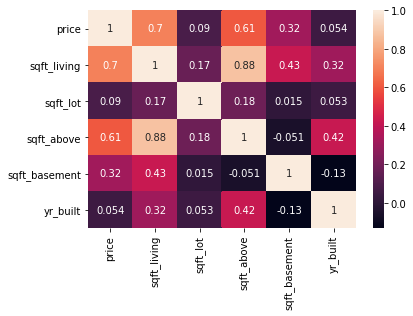

In [92]:
sns.heatmap(corrr, annot=True)  #heatmap with Correlations overlaid on features.
#Linearity: sqft living vs. sqft above,  
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

### low corrs with price. > 0.4  yr_built

In [93]:
corrr_cat = df[categorical].corr() #Correlation Table for Categorical Variables
corrr_cat

,bedrooms,bathrooms,floors,zipcode,grade,condition,waterfront,is_renovated
bedrooms,1.000000,0.527870,0.183707,-0.158588,0.366174,0.023440,-0.002054,0.018354
bathrooms,0.527870,1.000000,0.502574,-0.204778,0.665834,-0.126443,0.063628,0.046738
floors,0.183707,0.502574,1.000000,-0.059522,0.458783,-0.264013,0.020794,0.003705
zipcode,-0.158588,-0.204778,-0.059522,1.000000,-0.185761,0.002835,0.028925,0.062383
grade,0.366174,0.665834,0.458783,-0.185761,1.000000,-0.146854,0.082817,0.015254
condition,0.023440,-0.126443,-0.264013,0.002835,-0.146854,1.000000,0.016659,-0.055369
waterfront,-0.002054,0.063628,0.020794,0.028925,0.082817,0.016659,1.000000,0.074267
is_renovated,0.018354,0.046738,0.003705,0.062383,0.015254,-0.055369,0.074267,1.000000


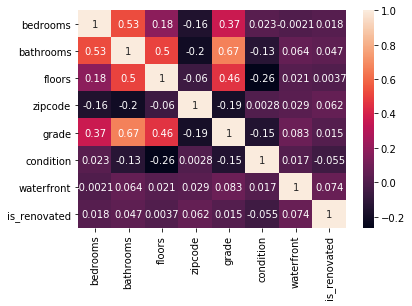

In [94]:
sns.heatmap(corrr_cat, annot=True)
#Linearity: sqft living vs. sqft above,  
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

### Linearity- Grade vs Bathrooms-- evaluate these guys
### Drop grade and keep condition?? Evaluate after Model Draft 1

In [95]:
df_cont = df[continuous] #Create a DataFarme for continuous data
df_cont.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,date
0,221900.0,1180,5650,1180,0.0,1955,2014-10-13
1,538000.0,2570,7242,2170,400.0,1951,2014-12-09
2,180000.0,770,10000,770,0.0,1933,2015-02-25
3,604000.0,1960,5000,1050,910.0,1965,2014-12-09
4,510000.0,1680,8080,1680,0.0,1987,2015-02-18


In [96]:
df_cont = df_cont.drop(['sqft_above'], axis=1) #sqrt living and above are collinear. Dropping sqrt_living because sqft_basement is included in the calculations for sqrt living


## Target Audience
### A Real Estate Company wants to help sellers decide a price to sell their homes in Kings County
* What are the most/least expensive homes based on zipcodes (cheapest area to live in vs most expensive)?
* What's the lowest grade/condition with the highest profit (and vice versa)?
* Correlation/relationship between yr_built vs grade? (what age is considered vintage/"desirable old"?)
* Whats the best month/time of year for buying and selling? (build model to predict year)

#### Future work: predict property taxes


In [97]:
#Perform Shapiro Test to check for normality

import warnings #Ignore all warnings
warnings.filterwarnings("ignore")

#Conduct Shapiro Test
from scipy import stats

#Convert DataFrame columns to numpy arrays in order to input into Shapiro and KS Test Functions
lot_arr = np.array(norm_check['sqft_lot'])
base_arr = np.array(norm_check['sqft_basement'])
built_arr = np.array(norm_check['yr_built'])
price_arr = np.array(norm_check['price'])



print('Shapiro Test sqft_lot: ', stats.shapiro(lot_arr))
print('Shapiro Test sqft_basement: ', stats.shapiro(base_arr))
print('Shapiro Test yr_built: ', stats.shapiro(built_arr))
print('Shapiro Test price: ', stats.shapiro(price_arr))
print('The p_values are less than 0.05 which tells us that the data is not normally distributed')

Shapiro Test sqft_lot:  (0.232710599899292, 0.0)
Shapiro Test sqft_basement:  (0.7031780481338501, 0.0)
Shapiro Test yr_built:  (0.9544544816017151, 0.0)
Shapiro Test price:  (0.7117679119110107, 0.0)
The p_values are less than 0.05 which tells us that the data is not normally distributed


In [98]:
#Conduct KS Test
print('KS Test sqft_lot: ', stats.kstest(lot_arr, 'norm'))
print('KS Test sqft_basement: ', stats.kstest(base_arr, 'norm'))
print('KS Test yr_built: ', stats.kstest(built_arr, 'norm'))
print('KS Test price: ', stats.kstest(price_arr, 'norm'))


KS Test sqft_lot:  KstestResult(statistic=1.0, pvalue=0.0)
KS Test sqft_basement:  KstestResult(statistic=0.5, pvalue=0.0)
KS Test yr_built:  KstestResult(statistic=1.0, pvalue=0.0)
KS Test price:  KstestResult(statistic=1.0, pvalue=0.0)


In [24]:
# Our P-value > 0.05, but we will make the data more normal to see how it impacts the model performance
#Standardization (This method DOES NOT Normalize Data)
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in norm_check.columns:
    df[feat] = norm_feat(df[feat])
df.describe()

norm_df = norm_feat(norm_check)
norm_df.head()


,price,sqft_lot,sqft_basement,yr_built
0,-0.866665,-0.228182,-0.649583,-0.544699
1,-0.006239,-0.189741,0.259869,-0.680867
2,-0.980717,-0.123144,-0.649583,-1.293624
3,0.173414,-0.243877,1.419420,-0.204279
4,-0.082455,-0.169506,-0.649583,0.544646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6cc00bbe0>,
      dtype=object)

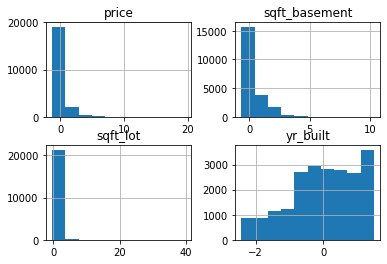

In [37]:
norm_df.hist()

In [25]:
# Mean Normalization
def mean_norm(series):
    return (series - series.mean()) / (series.max()- series.min())

top_feat = ['sqft_lot', 'sqft_basement', 'yr_built', 'price']
for feat in top_feat:
    df[feat] = mean_norm(df[feat])

mean_norm_df = mean_norm(norm_check)
mean_norm_df.head()




,price,sqft_lot,sqft_basement,yr_built
0,-0.041773,-0.005724,-0.059274,-0.139137
1,-0.000301,-0.004760,0.023713,-0.173920
2,-0.047270,-0.003089,-0.059274,-0.330442
3,0.008358,-0.006118,0.129522,-0.052181
4,-0.003974,-0.004252,-0.059274,0.139124


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9761c0fe10>,
      dtype=object)

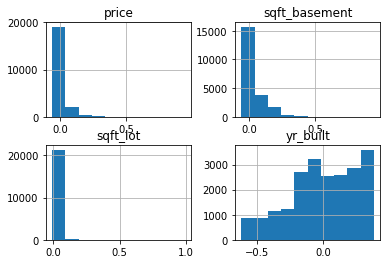

In [36]:
mean_norm_df.hist()

In [37]:
#Log Transformation
data_log = pd.DataFrame([])
data_log['loglot'] = np.log(norm_check['sqft_lot'])
data_log['logbase'] = np.log(norm_check['sqft_basement'])
data_log['logbuilt'] = np.log(norm_check['yr_built'])
data_log.head()
#Log Trans Produces '-inf' values, this will cause errors in our model
#data_log.hist();

,loglot,logbase,logbuilt
0,8.639411,-inf,7.578145
1,8.887653,5.991465,7.576097
2,9.210340,-inf,7.566828
3,8.517193,6.813445,7.583248
4,8.997147,-inf,7.594381


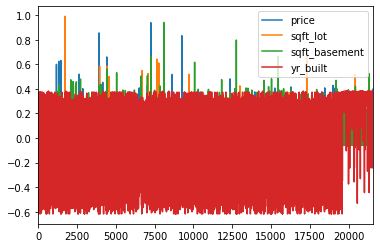

In [41]:
mean_norm_df.plot() #Conduct a visual check for normality after we've normalized the data (Do 3 more)


In [99]:
#Try treating categorical variables with Label Encoding
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
category_df = df[categorical]

cat_df = pd.DataFrame([])
cat_df['cond_dummy'] = lb_make.fit_transform(category_df.condition)
cat_df['grade_dummy'] = lb_make.fit_transform(category_df.grade)
cat_df['bed_dummy'] = lb_make.fit_transform(category_df.bedrooms)
cat_df['bath_dummy'] = lb_make.fit_transform(category_df.bathrooms)
cat_df['floor_dummy'] = lb_make.fit_transform(category_df.floors)
cat_df['zip_dummy'] = lb_make.fit_transform(category_df.zipcode)
cat_df['is_renovated'] = category_df['is_renovated']
cat_df.tail()


,cond_dummy,grade_dummy,bed_dummy,bath_dummy,floor_dummy,zip_dummy,is_renovated
21591,2,5,2,8,4,42,0.0
21592,2,5,3,8,2,60,0.0
21593,2,4,1,1,2,59,0.0
21594,2,5,2,8,2,15,0.0
21595,2,4,1,1,2,59,0.0


In [100]:
cat_df['is_renovated'] = cat_df['is_renovated'].fillna(0.0)

In [101]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 7 columns):
cond_dummy      21596 non-null int64
grade_dummy     21596 non-null int64
bed_dummy       21596 non-null int64
bath_dummy      21596 non-null int64
floor_dummy     21596 non-null int64
zip_dummy       21596 non-null int64
is_renovated    21596 non-null float64
dtypes: float64(1), int64(6)
memory usage: 1.2 MB


In [28]:
#Combine Categorical and Continuous data into one dataframe

complete_df = pd.concat([cat_df, norm_df], axis=1) #drop the padded zero column that was justed to combine the 2 dataframes
complete_df.head()


,cond_dummy,grade_dummy,bed_dummy,bath_dummy,floor_dummy,zip_dummy,is_renovated,price,sqft_lot,sqft_basement,yr_built
0,2.0,4.0,2.0,2.0,0.0,66.0,0.0,-0.866665,-0.228182,-0.649583,-0.544699
1,2.0,4.0,2.0,7.0,2.0,55.0,1.0,-0.006239,-0.189741,0.259869,-0.680867
2,2.0,3.0,1.0,2.0,0.0,16.0,0.0,-0.980717,-0.123144,-0.649583,-1.293624
3,4.0,4.0,3.0,10.0,0.0,58.0,0.0,0.173414,-0.243877,1.419420,-0.204279
4,2.0,5.0,2.0,6.0,0.0,37.0,0.0,-0.082455,-0.169506,-0.649583,0.544646


## 6/2 ToDo List


### Create qq-plots to check for linearity & homoscedicity
### Build 2 (drafts) models (Goal > 0.6)
### EDA- Exploratory Data Analysis (Answering our ques.)




       sqft_lot  sqft_basement  yr_built
0     -0.228182      -0.649583 -0.544699
1     -0.189741       0.259869 -0.680867
2     -0.123144      -0.649583 -1.293624
3     -0.243877       1.419420 -0.204279
4     -0.169506      -0.649583  0.544646
...         ...            ...       ...
21592 -0.337301      -0.649583  1.293570
21593 -0.224246      -0.649583  1.463780
21594 -0.332013      -0.649583  1.293570
21595 -0.306949      -0.649583  1.123360
21596 -0.338629      -0.649583  1.259528

[21596 rows x 3 columns] vs. price
R-Squared: 0.11880261741431908
Intercept: 9.020562075079397e-17
Slope: 0.07996825963373838
P-Value: 0.0
JB Score: 904495.3467951341 Probability: 0.0
  *        sqft_lot  sqft_basement  yr_built
0     -0.228182      -0.649583 -0.544699
1     -0.189741       0.259869 -0.680867
2     -0.123144      -0.649583 -1.293624
3     -0.243877       1.419420 -0.204279
4     -0.169506      -0.649583  0.544646
...         ...            ...       ...
21592 -0.337301      -0.649583  

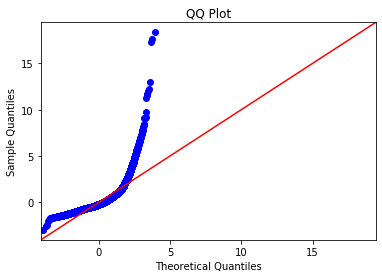

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     970.3
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:16:29   Log-Likelihood:                -29277.
No. Observations:               21596   AIC:                         5.856e+04
Df Residuals:                   21592   BIC:                         5.859e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.021e-17      0.006   1.41e-14      1.000      -0.013       0.013
sqft_lot          0.0800      0.006     12.497      0.000       0.067       0.093
sqft_basement     0.3320      0.006     51.513      0.000       0.319       0.345
yr_built          0.0929      0.006     14.398      0.000       0.080       0.106
==============================================================================
Omnibus:                    17964.300   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           904495.347
Skew:                           3.695   Prob(JB):                         0.00
Kurtosis:                      33.831   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#Model Built with Un-Normalized Data
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import scipy.stats as stats
def fullRegressionAnalysis(b, df, a='price'):
    '''a: str Dependent variable column name
        b: List of str Independent variable columns
        df: dataframe Dataframe to analyze
        
        First line of regression analysis between the dependent variable and a single independent variable in a dataFrame
    
        Returns
        R-squared value
        Intercept
        Slope
        P-Value
        JB Score & Probability of JB
        Statistical signfigance
        Rejection of normal distribution of errors
        Scatter plot with Line of Best Fit
        Regression plots for column2 vs. model
        QQ plot
        Model Summary Statistics'''

    
    b = df.drop(a, axis=1)
    pred_sum = '+'.join(b.columns)
    f = a+'~'+pred_sum
    model = ols(formula=f, data=df).fit()
    print (b, 'vs.', a)
    print ('R-Squared:',model.rsquared)
    print ('Intercept:',model.params[0])
    print ('Slope:',model.params[1])
    print ('P-Value:',round(model.pvalues[1],4))
    print ('JB Score:',sms.jarque_bera(model.resid)[0], 'Probability:', sms.jarque_bera(model.resid)[1])
    if model.pvalues[1] <= 0.05:
        print('  *',b,'HAS a statistically significant relationship to',a)
    else:
        print('  *',b,'DOES NOT HAVE a statistically significant relationship to',a)
    if sms.jarque_bera(model.resid)[0] >= 6 and sms.jarque_bera(model.resid)[1] <= 0.05:
        print('  * We REJECT the normal distribution of the model errors')
        #The code errors in this block- We'll need to trouble shootto get the rest to execute
#     X_new = pd.DataFrame([norm_df.min(), norm_df.max()]);
#     preds = model.predict(X_new)
#     data.plot(kind='scatter', x=b, y=a, title='Line of Best Fit');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, b, fig=fig)
#     plt.show()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title('QQ Plot')
    plt.show()    
    return model.summary()


a = 'price'
b = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=norm_df)

       sqft_lot  sqft_basement  yr_built
0     -0.005724      -0.059274 -0.139137
1     -0.004760       0.023713 -0.173920
2     -0.003089      -0.059274 -0.330442
3     -0.006118       0.129522 -0.052181
4     -0.004252      -0.059274  0.139124
...         ...            ...       ...
21592 -0.008462      -0.059274  0.330428
21593 -0.005626      -0.059274  0.373906
21594 -0.008329      -0.059274  0.330428
21595 -0.007700      -0.059274  0.286950
21596 -0.008495      -0.059274  0.321732

[21596 rows x 3 columns] vs. price
R-Squared: 0.11880261741431886
Intercept: 4.87890977618477e-18
Slope: 0.15364618112228007
P-Value: 0.0
JB Score: 904495.3467951348 Probability: 0.0
  *        sqft_lot  sqft_basement  yr_built
0     -0.005724      -0.059274 -0.139137
1     -0.004760       0.023713 -0.173920
2     -0.003089      -0.059274 -0.330442
3     -0.006118       0.129522 -0.052181
4     -0.004252      -0.059274  0.139124
...         ...            ...       ...
21592 -0.008462      -0.059274  0

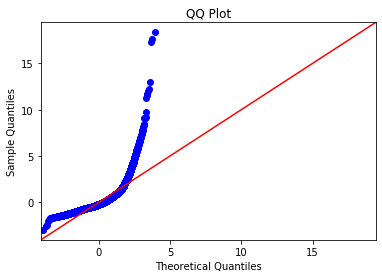

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     970.3
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:16:37   Log-Likelihood:                 36211.
No. Observations:               21596   AIC:                        -7.241e+04
Df Residuals:                   21592   BIC:                        -7.238e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.879e-18      0.000   1.58e-14      1.000      -0.001       0.001
sqft_lot          0.1536      0.012     12.497      0.000       0.130       0.178
sqft_basement     0.1754      0.003     51.513      0.000       0.169       0.182
yr_built          0.0175      0.001     14.398      0.000       0.015       0.020
==============================================================================
Omnibus:                    17964.300   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           904495.347
Skew:                           3.695   Prob(JB):                         0.00
Kurtosis:                      33.831   Cond. No.                         39.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#Model with Normalized Data
def fullRegressionAnalysis(b, df, a='price'):
    '''a: str Dependent variable column name
        b: List of str Independent variable columns
        df: dataframe Dataframe to analyze
        
        First line of regression analysis between the dependent variable and a single independent variable in a dataFrame
    
        Returns
        R-squared value
        Intercept
        Slope
        P-Value
        JB Score & Probability of JB
        Statistical signfigance
        Rejection of normal distribution of errors
        Scatter plot with Line of Best Fit
        Regression plots for column2 vs. model
        QQ plot
        Model Summary Statistics'''

    
    b = df.drop(a, axis=1)
    pred_sum = '+'.join(b.columns)
    f = a+'~'+pred_sum
    model = ols(formula=f, data=df).fit()
    print (b, 'vs.', a)
    print ('R-Squared:',model.rsquared)
    print ('Intercept:',model.params[0])
    print ('Slope:',model.params[1])
    print ('P-Value:',round(model.pvalues[1],4))
    print ('JB Score:',sms.jarque_bera(model.resid)[0], 'Probability:', sms.jarque_bera(model.resid)[1])
    if model.pvalues[1] <= 0.05:
        print('  *',b,'HAS a statistically significant relationship to',a)
    else:
        print('  *',b,'DOES NOT HAVE a statistically significant relationship to',a)
    if sms.jarque_bera(model.resid)[0] >= 6 and sms.jarque_bera(model.resid)[1] <= 0.05:
        print('  * We REJECT the normal distribution of the model errors')
        #The code errors in this block- We'll need to trouble shootto get the rest to execute
#     X_new = pd.DataFrame([norm_df.min(), norm_df.max()]);
#     preds = model.predict(X_new)
#     data.plot(kind='scatter', x=b, y=a, title='Line of Best Fit');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, b, fig=fig)
#     plt.show()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title('QQ Plot')
    plt.show()    
    return model.summary()



a = 'price'
b = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=mean_norm_df)

       sqft_lot  sqft_basement  yr_built
0     -0.228182      -0.649583 -0.544699
1     -0.189741       0.259869 -0.680867
2     -0.123144      -0.649583 -1.293624
3     -0.243877       1.419420 -0.204279
4     -0.169506      -0.649583  0.544646
...         ...            ...       ...
21592 -0.337301      -0.649583  1.293570
21593 -0.224246      -0.649583  1.463780
21594 -0.332013      -0.649583  1.293570
21595 -0.306949      -0.649583  1.123360
21596 -0.338629      -0.649583  1.259528

[21596 rows x 3 columns] vs. price
R-Squared: 0.11880261741431908
Intercept: 9.020562075079397e-17
Slope: 0.07996825963373838
P-Value: 0.0
JB Score: 904495.3467951341 Probability: 0.0
  *        sqft_lot  sqft_basement  yr_built
0     -0.228182      -0.649583 -0.544699
1     -0.189741       0.259869 -0.680867
2     -0.123144      -0.649583 -1.293624
3     -0.243877       1.419420 -0.204279
4     -0.169506      -0.649583  0.544646
...         ...            ...       ...
21592 -0.337301      -0.649583  

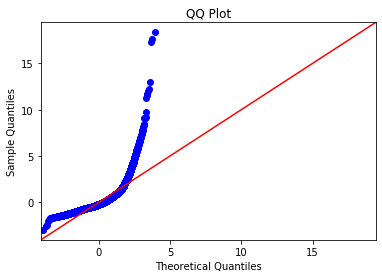

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     970.3
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:16:42   Log-Likelihood:                -29277.
No. Observations:               21596   AIC:                         5.856e+04
Df Residuals:                   21592   BIC:                         5.859e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.021e-17      0.006   1.41e-14      1.000      -0.013       0.013
sqft_lot          0.0800      0.006     12.497      0.000       0.067       0.093
sqft_basement     0.3320      0.006     51.513      0.000       0.319       0.345
yr_built          0.0929      0.006     14.398      0.000       0.080       0.106
==============================================================================
Omnibus:                    17964.300   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           904495.347
Skew:                           3.695   Prob(JB):                         0.00
Kurtosis:                      33.831   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Model with Non Normal and Non Standardized Data
def fullRegressionAnalysis(b, df, a='price'):
    '''a: str Dependent variable column name
        b: List of str Independent variable columns
        df: dataframe Dataframe to analyze
        
        First line of regression analysis between the dependent variable and a single independent variable in a dataFrame
    
        Returns
        R-squared value
        Intercept
        Slope
        P-Value
        JB Score & Probability of JB
        Statistical signfigance
        Rejection of normal distribution of errors
        Scatter plot with Line of Best Fit
        Regression plots for column2 vs. model
        QQ plot
        Model Summary Statistics'''

    
    b = df.drop(a, axis=1)
    pred_sum = '+'.join(b.columns)
    f = a+'~'+pred_sum
    model = ols(formula=f, data=df).fit()
    print (b, 'vs.', a)
    print ('R-Squared:',model.rsquared)
    print ('Intercept:',model.params[0])
    print ('Slope:',model.params[1])
    print ('P-Value:',round(model.pvalues[1],4))
    print ('JB Score:',sms.jarque_bera(model.resid)[0], 'Probability:', sms.jarque_bera(model.resid)[1])
    if model.pvalues[1] <= 0.05:
        print('  *',b,'HAS a statistically significant relationship to',a)
    else:
        print('  *',b,'DOES NOT HAVE a statistically significant relationship to',a)
    if sms.jarque_bera(model.resid)[0] >= 6 and sms.jarque_bera(model.resid)[1] <= 0.05:
        print('  * We REJECT the normal distribution of the model errors')
        #The code errors in this block- We'll need to trouble shootto get the rest to execute
#     X_new = pd.DataFrame([norm_df.min(), norm_df.max()]);
#     preds = model.predict(X_new)
#     data.plot(kind='scatter', x=b, y=a, title='Line of Best Fit');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, b, fig=fig)
#     plt.show()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title('QQ Plot')
    plt.show()    
    return model.summary()


a = 'price'
b = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=norm_df)

In [79]:
#Standardization
def standardize(df):
    standard_df = (df - df.mean())/df.std()
    return standard_df

In [83]:
standard_df = standardize(norm_check)

       sqft_lot  sqft_basement  yr_built
0     -0.228182      -0.649583 -0.544699
1     -0.189741       0.259869 -0.680867
2     -0.123144      -0.649583 -1.293624
3     -0.243877       1.419420 -0.204279
4     -0.169506      -0.649583  0.544646
...         ...            ...       ...
21592 -0.337301      -0.649583  1.293570
21593 -0.224246      -0.649583  1.463780
21594 -0.332013      -0.649583  1.293570
21595 -0.306949      -0.649583  1.123360
21596 -0.338629      -0.649583  1.259528

[21596 rows x 3 columns] vs. price
R-Squared: 0.11880261741431908
Intercept: 9.020562075079397e-17
Slope: 0.07996825963373838
P-Value: 0.0
JB Score: 904495.3467951341 Probability: 0.0
  *        sqft_lot  sqft_basement  yr_built
0     -0.228182      -0.649583 -0.544699
1     -0.189741       0.259869 -0.680867
2     -0.123144      -0.649583 -1.293624
3     -0.243877       1.419420 -0.204279
4     -0.169506      -0.649583  0.544646
...         ...            ...       ...
21592 -0.337301      -0.649583  

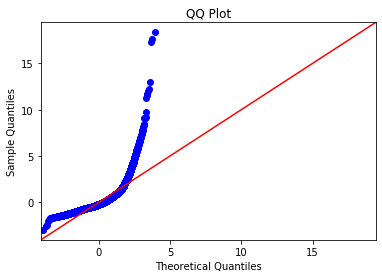

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     970.3
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:22:36   Log-Likelihood:                -29277.
No. Observations:               21596   AIC:                         5.856e+04
Df Residuals:                   21592   BIC:                         5.859e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.021e-17      0.006   1.41e-14      1.000      -0.013       0.013
sqft_lot          0.0800      0.006     12.497      0.000       0.067       0.093
sqft_basement     0.3320      0.006     51.513      0.000       0.319       0.345
yr_built          0.0929      0.006     14.398      0.000       0.080       0.106
==============================================================================
Omnibus:                    17964.300   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           904495.347
Skew:                           3.695   Prob(JB):                         0.00
Kurtosis:                      33.831   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
def fullRegressionAnalysis(b, df, a='price'):
    '''a: str Dependent variable column name
        b: List of str Independent variable columns
        df: dataframe Dataframe to analyze
        
        First line of regression analysis between the dependent variable and a single independent variable in a dataFrame
    
        Returns
        R-squared value
        Intercept
        Slope
        P-Value
        JB Score & Probability of JB
        Statistical signfigance
        Rejection of normal distribution of errors
        Scatter plot with Line of Best Fit
        Regression plots for column2 vs. model
        QQ plot
        Model Summary Statistics'''

    
    b = df.drop(a, axis=1)
    pred_sum = '+'.join(b.columns)
    f = a+'~'+pred_sum
    model = ols(formula=f, data=df).fit()
    print (b, 'vs.', a)
    print ('R-Squared:',model.rsquared)
    print ('Intercept:',model.params[0])
    print ('Slope:',model.params[1])
    print ('P-Value:',round(model.pvalues[1],4))
    print ('JB Score:',sms.jarque_bera(model.resid)[0], 'Probability:', sms.jarque_bera(model.resid)[1])
    if model.pvalues[1] <= 0.05:
        print('  *',b,'HAS a statistically significant relationship to',a)
    else:
        print('  *',b,'DOES NOT HAVE a statistically significant relationship to',a)
    if sms.jarque_bera(model.resid)[0] >= 6 and sms.jarque_bera(model.resid)[1] <= 0.05:
        print('  * We REJECT the normal distribution of the model errors')
        #The code errors in this block- We'll need to trouble shootto get the rest to execute
#     X_new = pd.DataFrame([norm_df.min(), norm_df.max()]);
#     preds = model.predict(X_new)
#     data.plot(kind='scatter', x=b, y=a, title='Line of Best Fit');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, b, fig=fig)
#     plt.show()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title('QQ Plot')
    plt.show()    
    return model.summary()

a = 'price'
b = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=standard_df)

       cond_dummy  grade_dummy  bed_dummy  bath_dummy  floor_dummy  zip_dummy  \
0             2.0          4.0        2.0         2.0          0.0       66.0   
1             2.0          4.0        2.0         7.0          2.0       55.0   
2             2.0          3.0        1.0         2.0          0.0       16.0   
3             4.0          4.0        3.0        10.0          0.0       58.0   
4             2.0          5.0        2.0         6.0          0.0       37.0   
...           ...          ...        ...         ...          ...        ...   
21592         2.0          5.0        3.0         8.0          2.0       60.0   
21593         2.0          4.0        1.0         1.0          2.0       59.0   
21594         2.0          5.0        2.0         8.0          2.0       15.0   
21595         2.0          4.0        1.0         1.0          2.0       59.0   
21596         NaN          NaN        NaN         NaN          NaN        NaN   

       is_renovated  sqft_l

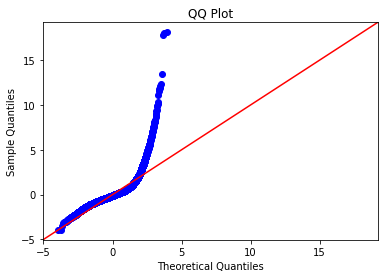

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     1149.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:22:41   Log-Likelihood:                -26034.
No. Observations:               21595   AIC:                         5.209e+04
Df Residuals:                   21584   BIC:                         5.218e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.1804      0.038    -57.273      0.000      -2.255      -2.106
cond_dummy        0.1040      0.009     11.383      0.000       0.086       0.122
grade_dummy       0.3724      0.006     57.496      0.000       0.360       0.385
bed_dummy        -0.0388      0.007     -5.292      0.000      -0.053      -0.024
bath_dummy        0.0235      0.003      8.041      0.000       0.018       0.029
floor_dummy       0.0849      0.007     12.721      0.000       0.072       0.098
zip_dummy         0.0011      0.000      3.463      0.001       0.000       0.002
is_renovated      0.4046      0.031     12.915      0.000       0.343       0.466
sqft_lot          0.0490      0.006      8.831      0.000       0.038       0.060
sqft_basement     0.2515      0.006     40.738      0.000       0.239       0.264
yr_built         -0.1020      0.007    -14.555      0.000      -0.116      -0.088
==============================================================================
Omnibus:                    17904.579   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1062074.602
Skew:                           3.611   Prob(JB):                         0.00
Kurtosis:                      36.589   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#Full Regression With Complete DataFrame (Categorical variables AND Continuous)
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import scipy.stats as stats
def fullRegressionAnalysis(b, df, a='price'):
    '''a: str Dependent variable column name
        b: List of str Independent variable columns
        df: dataframe Dataframe to analyze
        
        First line of regression analysis between the dependent variable and a single independent variable in a dataFrame
    
        Returns
        R-squared value
        Intercept
        Slope
        P-Value
        JB Score & Probability of JB
        Statistical signfigance
        Rejection of normal distribution of errors
        Scatter plot with Line of Best Fit
        Regression plots for column2 vs. model
        QQ plot
        Model Summary Statistics'''

    
    b = df.drop(a, axis=1)
    pred_sum = '+'.join(b.columns)
    f = a+'~'+pred_sum
    model = ols(formula=f, data=df).fit()
    print (b, 'vs.', a)
    print ('R-Squared:',model.rsquared)
    print ('Intercept:',model.params[0])
    print ('Slope:',model.params[1])
    print ('P-Value:',round(model.pvalues[1],4))
    print ('JB Score:',sms.jarque_bera(model.resid)[0], 'Probability:', sms.jarque_bera(model.resid)[1])
    if model.pvalues[1] <= 0.05:
        print('  *',b,'HAS a statistically significant relationship to',a)
    else:
        print('  *',b,'DOES NOT HAVE a statistically significant relationship to',a)
    if sms.jarque_bera(model.resid)[0] >= 6 and sms.jarque_bera(model.resid)[1] <= 0.05:
        print('  * We REJECT the normal distribution of the model errors')
        #The code errors in this block- We'll need to trouble shootto get the rest to execute
#     X_new = pd.DataFrame([norm_df.min(), norm_df.max()]);
#     preds = model.predict(X_new)
#     data.plot(kind='scatter', x=b, y=a, title='Line of Best Fit');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, b, fig=fig)
#     plt.show()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title('QQ Plot')
    plt.show()    
    return model.summary()

a = 'price'
b = ['cond_dummy', 'grade_dummy', 'bed_dummy', 'bath_dummy', 'floor_dummy', 'zip_dummy','is_renovated', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=complete_df)

### Edit Outlier Treatment Code


In [86]:
nonnorm_complete = pd.concat([cat_df, norm_check], axis=1)
nonnorm_complete.tail()

,cond_dummy,grade_dummy,bed_dummy,bath_dummy,floor_dummy,zip_dummy,is_renovated,price,sqft_lot,sqft_basement,yr_built
21592,2.0,5.0,3.0,8.0,2.0,60.0,0.0,360000.0,1131.0,0.0,2009.0
21593,2.0,4.0,1.0,1.0,2.0,59.0,0.0,400000.0,5813.0,0.0,2014.0
21594,2.0,5.0,2.0,8.0,2.0,15.0,0.0,402101.0,1350.0,0.0,2009.0
21595,2.0,4.0,1.0,1.0,2.0,59.0,0.0,400000.0,2388.0,0.0,2004.0
21596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325000.0,1076.0,0.0,2008.0


In [82]:
nonnorm_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 11 columns):
cond_dummy       21596 non-null float64
grade_dummy      21596 non-null float64
bed_dummy        21596 non-null float64
bath_dummy       21596 non-null float64
floor_dummy      21596 non-null float64
zip_dummy        21596 non-null float64
is_renovated     21596 non-null float64
price            21596 non-null float64
sqft_lot         21596 non-null float64
sqft_basement    21596 non-null float64
yr_built         21596 non-null float64
dtypes: float64(11)
memory usage: 2.0 MB


In [136]:
#Oulier Treatment
#Remove Outliers 


Q35 = norm_check.quantile(.35) #Calculate the 25th percentile 
Q65 = norm_check.quantile(.65) #Calculate the 75th percentile 
IQR = Q35 - Q65
print(IQR)


#Trim Outliers by IQR Score
cont_trim_df = norm_check[~((norm_check < (Q35 - 1.5 * IQR)) |(norm_check > (Q65 + 1.5 * IQR))).any(axis=1)]
print(cont_trim_df.shape)




price           -180000.0
sqft_lot          -3056.0
sqft_basement      -250.0
yr_built            -27.0
dtype: float64
(0, 4)


### Check Z-Values for Outliers

In [37]:
z = stats.zscore(norm_check)
print(z)

[[-0.86668512 -0.22818737 -0.64959762 -0.54471173]
 [-0.00623887 -0.18974495  0.25987512 -0.68088296]
 [-0.98073984 -0.12314685 -0.64959762 -1.2936535 ]
 ...
 [-0.37616542 -0.33202053 -0.64959762  1.29359991]
 [-0.38188449 -0.30695568 -0.64959762  1.12338587]
 [-0.58603973 -0.33863687 -0.64959762  1.2595571 ]]


In [43]:
threshold = 3
print(np.where(z > 3))

(array([   10,    21,    41,    70,   145,   153,   153,   185,   199,
         218,   238,   239,   246,   246,   269,   282,   300,   300,
         312,   380,   411,   416,   419,   443,   484,   518,   519,
         527,   540,   556,   556,   561,   577,   590,   642,   656,
         681,   756,   762,   779,   779,   814,   814,   847,   858,
         928,   934,  1007,  1030,  1034,  1044,  1132,  1150,  1159,
        1162,  1162,  1197,  1215,  1270,  1280,  1313,  1313,  1322,
        1359,  1359,  1418,  1421,  1431,  1434,  1446,  1622,  1642,
        1651,  1674,  1694,  1701,  1717,  1728,  1730,  1768,  1772,
        1793,  1806,  1812,  1836,  1942,  1943,  1965,  2018,  2022,
        2038,  2038,  2083,  2086,  2110,  2134,  2138,  2177,  2198,
        2234,  2234,  2265,  2265,  2271,  2318,  2353,  2397,  2409,
        2442,  2442,  2459,  2471,  2510,  2511,  2563,  2570,  2604,
        2624,  2632,  2650,  2651,  2666,  2711,  2747,  2755,  2770,
        2793,  2797

In [45]:
#Replace Outliers with the Median
print(norm_check['price'].quantile(0.50)) #Print the median
print(norm_check['price'].quantile(0.85)) #Print the 85th percentile
norm_check['price'] = np.where(norm_check['price'] > 703942.5, 450000.0, norm_check['price']) #Replace values greater than the 95th percentile with the median value


print(norm_check['sqft_lot'].quantile(0.50)) #Print the median
print(norm_check['sqft_lot'].quantile(0.85)) #Print the 85th percentile
norm_check['sqft_lot'] = np.where(norm_check['sqft_lot'] > 12182.25, 7618.5, norm_check['sqft_lot']) #Replace values greater than the 95th percentile with the median value



#Trim 
# index = data[(data['annual_inc'] >= 256000)].index
# data.drop(index, inplace=True)

print(norm_check['sqft_basement'].quantile(0.50)) #Print the median the median is zero here. should we convert to categorical?
print(norm_check['sqft_basement'].quantile(0.85)) #Print the 85th percentile
#nonnorm_complete = np.where(imdb_ratings_basics_df['runtime_minutes'] > 1975.0, 90, imdb_ratings_basics_df['runtime_minutes']) #Replace values greater than the 95th percentile with the median value
# # imdb_ratings_basics_df.describe()

print(norm_check['yr_built'].quantile(0.50)) #Print the median
print(norm_check['yr_built'].quantile(0.85)) #Print the 85th percentile
# # nonnorm_complete = np.where(imdb_ratings_basics_df['runtime_minutes'] > 133, 90, imdb_ratings_basics_df['runtime_minutes']) #Replace values greater than the 95th percentile with the median value

450000.0
703942.5
7618.5
12182.25
0.0
800.0
1975.0
2004.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3ff7e0c88>,
      dtype=object)

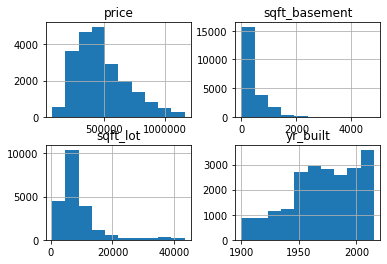

In [42]:
norm_check.hist()

In [48]:
non_scale_df = pd.concat([norm_check, cat_df], axis=1) #Wheretf did these NaNs come from
non_scale_df

,price,sqft_lot,sqft_basement,yr_built,cond_dummy,grade_dummy,bed_dummy,bath_dummy,floor_dummy,zip_dummy,is_renovated
0,221900.0,5650.0,0.0,1955.0,2.0,4.0,2.0,2.0,0.0,66.0,0.0
1,538000.0,7242.0,400.0,1951.0,2.0,4.0,2.0,7.0,2.0,55.0,1.0
2,180000.0,10000.0,0.0,1933.0,2.0,3.0,1.0,2.0,0.0,16.0,0.0
3,604000.0,5000.0,910.0,1965.0,4.0,4.0,3.0,10.0,0.0,58.0,0.0
4,510000.0,8080.0,0.0,1987.0,2.0,5.0,2.0,6.0,0.0,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131.0,0.0,2009.0,2.0,5.0,3.0,8.0,2.0,60.0,0.0
21593,400000.0,5813.0,0.0,2014.0,2.0,4.0,1.0,1.0,2.0,59.0,0.0
21594,402101.0,1350.0,0.0,2009.0,2.0,5.0,2.0,8.0,2.0,15.0,0.0
21595,400000.0,2388.0,0.0,2004.0,2.0,4.0,1.0,1.0,2.0,59.0,0.0


       sqft_lot  sqft_basement  yr_built
0          5650            0.0      1955
1          7242          400.0      1951
2         10000            0.0      1933
3          5000          910.0      1965
4          8080            0.0      1987
...         ...            ...       ...
21592      1131            0.0      2009
21593      5813            0.0      2014
21594      1350            0.0      2009
21595      2388            0.0      2004
21596      1076            0.0      2008

[18067 rows x 3 columns] vs. price
R-Squared: 0.05024983594365706
Intercept: -433124.8972492507
Slope: -1.7861511363765397
P-Value: 0.0
JB Score: 2129.956430773382 Probability: 0.0
  *        sqft_lot  sqft_basement  yr_built
0          5650            0.0      1955
1          7242          400.0      1951
2         10000            0.0      1933
3          5000          910.0      1965
4          8080            0.0      1987
...         ...            ...       ...
21592      1131            0.0     

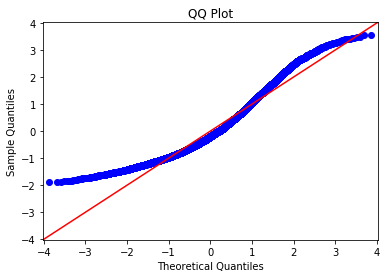

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     318.6
Date:                Wed, 03 Jun 2020   Prob (F-statistic):          1.45e-201
Time:                        14:40:15   Log-Likelihood:            -2.4587e+05
No. Observations:               18067   AIC:                         4.918e+05
Df Residuals:                   18063   BIC:                         4.918e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.331e+05    9.8e+04     -4.419      0.000   -6.25e+05   -2.41e+05
sqft_lot         -1.7862      0.416     -4.295      0.000      -2.601      -0.971
sqft_basement   124.9784      4.087     30.580      0.000     116.968     132.989
yr_built        446.4916     49.581      9.005      0.000     349.307     543.676
==============================================================================
Omnibus:                     1644.661   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2129.956
Skew:                           0.833   Prob(JB):                         0.00
Kurtosis:                       3.226   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#Model with data under 25th Quantile and Over the 75th removed
def fullRegressionAnalysis(b, df, a='price'):
    '''a: str Dependent variable column name
        b: List of str Independent variable columns
        df: dataframe Dataframe to analyze
        
        First line of regression analysis between the dependent variable and a single independent variable in a dataFrame
    
        Returns
        R-squared value
        Intercept
        Slope
        P-Value
        JB Score & Probability of JB
        Statistical signfigance
        Rejection of normal distribution of errors
        Scatter plot with Line of Best Fit
        Regression plots for column2 vs. model
        QQ plot
        Model Summary Statistics'''

    
    b = df.drop(a, axis=1)
    pred_sum = '+'.join(b.columns)
    f = a+'~'+pred_sum
    model = ols(formula=f, data=df).fit()
    print (b, 'vs.', a)
    print ('R-Squared:',model.rsquared)
    print ('Intercept:',model.params[0])
    print ('Slope:',model.params[1])
    print ('P-Value:',round(model.pvalues[1],4))
    print ('JB Score:',sms.jarque_bera(model.resid)[0], 'Probability:', sms.jarque_bera(model.resid)[1])
    if model.pvalues[1] <= 0.05:
        print('  *',b,'HAS a statistically significant relationship to',a)
    else:
        print('  *',b,'DOES NOT HAVE a statistically significant relationship to',a)
    if sms.jarque_bera(model.resid)[0] >= 6 and sms.jarque_bera(model.resid)[1] <= 0.05:
        print('  * We REJECT the normal distribution of the model errors')
        #The code errors in this block- We'll need to trouble shootto get the rest to execute
#     X_new = pd.DataFrame([norm_df.min(), norm_df.max()]);
#     preds = model.predict(X_new)
#     data.plot(kind='scatter', x=b, y=a, title='Line of Best Fit');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, b, fig=fig)
#     plt.show()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title('QQ Plot')
    plt.show()    
    return model.summary()

a = 'price'
b = ['cond_dummy', 'grade_dummy', 'bed_dummy', 'bath_dummy', 'floor_dummy', 'zip_dummy','is_renovated', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=cont_trim_df )

       sqft_lot  sqft_basement  yr_built  cond_dummy  grade_dummy  bed_dummy  \
0        5650.0            0.0    1955.0         2.0          4.0        2.0   
1        7242.0          400.0    1951.0         2.0          4.0        2.0   
2       10000.0            0.0    1933.0         2.0          3.0        1.0   
3        5000.0          910.0    1965.0         4.0          4.0        3.0   
4        8080.0            0.0    1987.0         2.0          5.0        2.0   
...         ...            ...       ...         ...          ...        ...   
21592    1131.0            0.0    2009.0         2.0          5.0        3.0   
21593    5813.0            0.0    2014.0         2.0          4.0        1.0   
21594    1350.0            0.0    2009.0         2.0          5.0        2.0   
21595    2388.0            0.0    2004.0         2.0          4.0        1.0   
21596    1076.0            0.0    2008.0         NaN          NaN        NaN   

       bath_dummy  floor_dummy  zip_dum

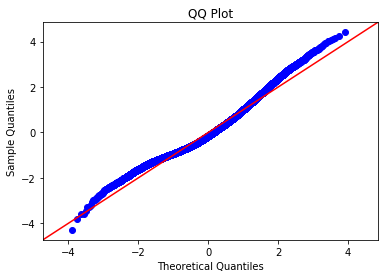

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     606.5
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:22:41   Log-Likelihood:            -2.9229e+05
No. Observations:               21595   AIC:                         5.846e+05
Df Residuals:                   21584   BIC:                         5.847e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.003e+06   1.07e+05      9.352      0.000    7.93e+05    1.21e+06
sqft_lot          0.8241      0.199      4.143      0.000       0.434       1.214
sqft_basement    71.6224      3.177     22.543      0.000      65.395      77.850
yr_built       -492.5912     53.971     -9.127      0.000    -598.378    -386.804
cond_dummy     2.375e+04   2068.356     11.482      0.000    1.97e+04    2.78e+04
grade_dummy     6.45e+04   1483.136     43.491      0.000    6.16e+04    6.74e+04
bed_dummy      6090.1872   1662.992      3.662      0.000    2830.600    9349.775
bath_dummy      487.0478    662.832      0.735      0.462    -812.152    1786.247
floor_dummy    2.321e+04   1528.416     15.187      0.000    2.02e+04    2.62e+04
zip_dummy       530.4462     69.260      7.659      0.000     394.692     666.200
is_renovated   4.846e+04   7091.644      6.834      0.000    3.46e+04    6.24e+04
==============================================================================
Omnibus:                     1431.596   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1754.637
Skew:                           0.652   Prob(JB):                         0.00
Kurtosis:                       3.501   Cond. No.                     9.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#Model with 85% Quantile was replaced with the mean

def fullRegressionAnalysis(b, df, a='price'):
    '''a: str Dependent variable column name
        b: List of str Independent variable columns
        df: dataframe Dataframe to analyze
        
        First line of regression analysis between the dependent variable and a single independent variable in a dataFrame
    
        Returns
        R-squared value
        Intercept
        Slope
        P-Value
        JB Score & Probability of JB
        Statistical signfigance
        Rejection of normal distribution of errors
        Scatter plot with Line of Best Fit
        Regression plots for column2 vs. model
        QQ plot
        Model Summary Statistics'''

    
    b = df.drop(a, axis=1)
    pred_sum = '+'.join(b.columns)
    f = a+'~'+pred_sum
    model = ols(formula=f, data=df).fit()
    print (b, 'vs.', a)
    print ('R-Squared:',model.rsquared)
    print ('Intercept:',model.params[0])
    print ('Slope:',model.params[1])
    print ('P-Value:',round(model.pvalues[1],4))
    print ('JB Score:',sms.jarque_bera(model.resid)[0], 'Probability:', sms.jarque_bera(model.resid)[1])
    if model.pvalues[1] <= 0.05:
        print('  *',b,'HAS a statistically significant relationship to',a)
    else:
        print('  *',b,'DOES NOT HAVE a statistically significant relationship to',a)
    if sms.jarque_bera(model.resid)[0] >= 6 and sms.jarque_bera(model.resid)[1] <= 0.05:
        print('  * We REJECT the normal distribution of the model errors')
        #The code errors in this block- We'll need to trouble shootto get the rest to execute
#     X_new = pd.DataFrame([norm_df.min(), norm_df.max()]);
#     preds = model.predict(X_new)
#     data.plot(kind='scatter', x=b, y=a, title='Line of Best Fit');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, b, fig=fig)
#     plt.show()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title('QQ Plot')
    plt.show()    
    return model.summary()

a = 'price'
b = ['cond_dummy', 'grade_dummy', 'bed_dummy', 'bath_dummy', 'floor_dummy', 'zip_dummy','is_renovated', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=non_scale_df)

In [109]:
#df = cont_trim_df

df['month_sold'] = pd.DatetimeIndex(df_copy['date']).month
df['yr_sold'] = pd.DatetimeIndex(df_copy['date']).year

df['age'] = df['yr_sold'] - df['yr_built']
df['%yard'] = (df['sqft_lot'] - (df['sqft_above'] / df['floors'])) / df['sqft_lot']

ValueError: Length of values does not match length of index

In [50]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,month_sold,yr_sold,age,%yard,is_renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,10,2014,59,0.791150,0.0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,12,2014,63,0.850180,1.0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,2,2015,82,0.923000,0.0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,12,2014,49,0.790000,0.0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,2,2015,28,0.792079,0.0


In [117]:
df.loc[(df['sqft_basement'] > 0), 'sqft_basement'] = 1 #Make sqft_basemment a binomial variable; 1 = The house has a basement, 0 = the house does not have a basement

In [120]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

a = 'price'
b = df.drop(a, axis=1)
pred_sum = '+'.join(b.columns)
f = a+'~'+pred_sum

model = ols(formula=f, data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     105.1
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:50:04   Log-Likelihood:            -2.9585e+05
No. Observations:               21596   AIC:                         5.925e+05
Df Residuals:                   21210   BIC:                         5.956e+05
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 5.648e+06   3.13e+06      1.806      0.071   -4.81e+05    1.18e+07
date[T.Timestamp('2014-05-03 00:00:00')]  1.591e+05   1.12e+05      1.422      0.155   -6.03e+04    3.78e+05
date[T.Timestamp('2014-05-04 00:00:00')]  -1.22e+05   1.01e+05     -1.210      0.226    -3.2e+05    7.56e+04
date[T.Timestamp('2014-05-05 00:00:00')]  2.858e+04   3.56e+04      0.803      0.422   -4.12e+04    9.84e+04
date[T.Timestamp('2014-05-06 00:00:00')]  1.603e+04   3.57e+04      0.449      0.654    -5.4e+04     8.6e+04
date[T.Timestamp('2014-05-07 00:00:00')]  1.418e+04   3.48e+04      0.407      0.684   -5.41e+04    8.25e+04
date[T.Timestamp('2014-05-08 00:00:00')]  4.271e+04   3.59e+04      1.189      0.234   -2.77e+04    1.13e+05
date[T.Timestamp('2014-05-09 00:00:00')] -1.921e+04   3.59e+04     -0.535      0.593   -8.96e+04    5.12e+04
date[T.Timestamp('2014-05-10 00:00:00')] -3.192e+04   1.01e+05     -0.317      0.752    -2.3e+05    1.66e+05
date[T.Timestamp('2014-05-11 00:00:00')]   1.17e+04   1.56e+05      0.075      0.940   -2.94e+05    3.18e+05
date[T.Timestamp('2014-05-12 00:00:00')]  2.762e+04    3.6e+04      0.767      0.443    -4.3e+04    9.82e+04
date[T.Timestamp('2014-05-13 00:00:00')]  6.289e+04   3.54e+04      1.775      0.076   -6554.200    1.32e+05
date[T.Timestamp('2014-05-14 00:00:00')] -1860.3068   3.59e+04     -0.052      0.959   -7.22e+04    6.85e+04
date[T.Timestamp('2014-05-15 00:00:00')]  1.852e+04   3.58e+04      0.517      0.605   -5.17e+04    8.87e+04
date[T.Timestamp('2014-05-16 00:00:00')] -3312.9452   3.68e+04     -0.090      0.928   -7.54e+04    6.88e+04
date[T.Timestamp('2014-05-17 00:00:00')]  8.521e+04   2.19e+05      0.389      0.697   -3.44e+05    5.15e+05
date[T.Timestamp('2014-05-18 00:00:00')]  1.393e+04   8.64e+04      0.161      0.872   -1.55e+05    1.83e+05
date[T.Timestamp('2014-05-19 00:00:00')]  1.632e+04   3.57e+04      0.457      0.648   -5.37e+04    8.63e+04
date[T.Timestamp('2014-05-20 00:00:00')]  1.169e+04   3.34e+04      0.350      0.726   -5.37e+04    7.71e+04
date[T.Timestamp('2014-05-21 00:00:00')]  2.309e+04   3.48e+04      0.664      0.506    -4.5e+04    9.12e+04
date[T.Timestamp('2014-05-22 00:00:00')]  2966.1279    3.5e+04      0.085      0.932   -6.56e+04    7.16e+04
date[T.Timestamp('2014-05-23 00:00:00')]  1.192e+04   3.56e+04      0.335      0.738   -5.79e+04    8.17e+04
date[T.Timestamp('2014-05-24 00:00:00')]  2.163e+04   7.08e+04      0.306      0.760   -1.17e+05     1.6e+05
date[T.Timestamp('2014-05-25 00:00:00')] -1.142e+05   1.01e+05     -1.133      0.257   -3.12e+05    8.34e+04
date[T.Timestamp('2014-05-26 00:00:00')]  2.623e+04   8.13e+04      0.322      0.747   -1.33e+05    1.86e+05
date[T.Timestamp('2014-05-27 00

In [135]:
dfwithout_date = df.drop(['date', 'sqft_above', 'sqft_basement', 'zipcode'], axis=1)
#Date was removed because the Linear regression can't work with datetime objects, and 'sqft_above', 'sqft_basement', 'zipcode' had p_value > 0.05 
import statsmodels.api as sm
from statsmodels.formula.api import ols

a = 'price'
b = dfwithout_date.drop(a, axis=1)
pred_sum = '+'.join(b.columns)
f = a+'~'+pred_sum

model = ols(formula=f, data=dfwithout_date).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3599.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:10:46   Log-Likelihood:            -2.9613e+05
No. Observations:               21596   AIC:                         5.923e+05
Df Residuals:                   21584   BIC:                         5.924e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.576e+06   1.36e+05     48.385      0.000    6.31e+06    6.84e+06
bedrooms     -4.664e+04   2132.159    -21.877      0.000   -5.08e+04   -4.25e+04
bathrooms     4.973e+04   3482.980     14.278      0.000    4.29e+04    5.66e+04
sqft_living    180.3604      3.318     54.365      0.000     173.858     186.863
sqft_lot        -0.2456      0.037     -6.690      0.000      -0.318      -0.174
floors        2.113e+04   3457.645      6.110      0.000    1.43e+04    2.79e+04
waterfront    7.537e+05   1.84e+04     41.030      0.000    7.18e+05     7.9e+05
condition     2.091e+04   2513.901      8.318      0.000     1.6e+04    2.58e+04
grade         1.288e+05   2155.494     59.758      0.000    1.25e+05    1.33e+05
yr_built     -3780.0502     69.722    -54.216      0.000   -3916.710   -3643.391
yr_renovated  3124.6813    515.874      6.057      0.000    2113.530    4135.832
is_renovated -6.209e+06   1.03e+06     -6.030      0.000   -8.23e+06   -4.19e+06
==============================================================================
Omnibus:                    15782.884   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1001665.822
Skew:                           2.918   Prob(JB):                         0.00
Kurtosis:                      35.850   Cond. No.                     3.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
#Try Feature ranking with recursive feature elimination

#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

predictors = dfwithout_date.drop('price', axis=1)
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(predictors, dfwithout_date['price'])


In [112]:
selector.support_ #true are the selected features (columns)

array([False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False,  True])

In [113]:
selector.ranking_ #ones are the selected features

array([ 4,  1,  6, 10,  2,  1,  1,  1,  8,  7,  3,  5,  9,  1])

In [114]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 68683.77832548 888251.51646867  79420.49616743 180061.51381345
 191608.02880248]
-1267343.752776259


In [116]:
predictors.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'is_renovated'],
      dtype='object')

In [133]:
top5_list = ['price','bathrooms', 'waterfront', 'condition', 'grade', 'is_renovated' ]
top5_feat = df[top5_list]

In [134]:
a = 'price'
b = top5_feat.drop(a, axis=1)
pred_sum = '+'.join(b.columns)
f = a+'~'+pred_sum

model = ols(formula=f, data=top5_feat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     4837.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:59:52   Log-Likelihood:            -2.9926e+05
No. Observations:               21596   AIC:                         5.985e+05
Df Residuals:                   21590   BIC:                         5.986e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.267e+06    1.6e+04    -79.040      0.000    -1.3e+06   -1.24e+06
bathrooms     6.868e+04   2998.546     22.906      0.000    6.28e+04    7.46e+04
waterfront    8.883e+05   2.11e+04     42.105      0.000    8.47e+05     9.3e+05
condition     7.942e+04   2675.913     29.680      0.000    7.42e+04    8.47e+04
grade         1.801e+05   1972.808     91.272      0.000    1.76e+05    1.84e+05
is_renovated  1.916e+05   9466.208     20.241      0.000    1.73e+05     2.1e+05
==============================================================================
Omnibus:                    17989.479   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1537692.786
Skew:                           3.503   Prob(JB):                         0.00
Kurtosis:                      43.740   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
Q35 = dfwithout_date.quantile(.45) #Calculate the 25th percentile 
Q65 = dfwithout_date.quantile(.55) #Calculate the 75th percentile 
IQR = Q65 - Q35
print(IQR)


#Trim Outliers by IQR Score
cont_trim_df = dfwithout_date[~((dfwithout_date < (Q35 - 1.5 * IQR)) |(dfwithout_date > (Q65 + 1.5 * IQR))).any(axis=1)]
print(cont_trim_df.shape)

price           57000.00
bedrooms            0.00
bathrooms           0.25
sqft_living       210.00
sqft_lot          854.50
floors              0.50
waterfront          0.00
condition           0.00
grade               1.00
yr_built           10.00
yr_renovated        0.00
is_renovated        0.00
dtype: float64
(252, 12)


In [ ]:
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))